# California Housing Price Prediction

The aims of this project is to analyze and predict the housing price in California, USA

Dataset sources: [here](https://github.com/ageron/handson-ml2/tree/master/datasets/housing)


## Prepare the Problem

Import libraries

In [1]:
import pickle

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

Load the dataset

In [2]:
df = pd.read_csv("dataset/california-housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## Data Summarization

Shows the summary of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


It can be seen that there are 20640 instance in the dataset, and there's some missing values in 'total_bedrooms' attributes, where's there only 20433 non-null values. It can also be seen that all attributes is in numeric value, except the 'ocean_proximity'

Count each category in 'ocean_proximity"

In [4]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Generate descriptive statistics of the dataset

In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Plot a histogram for each attribute

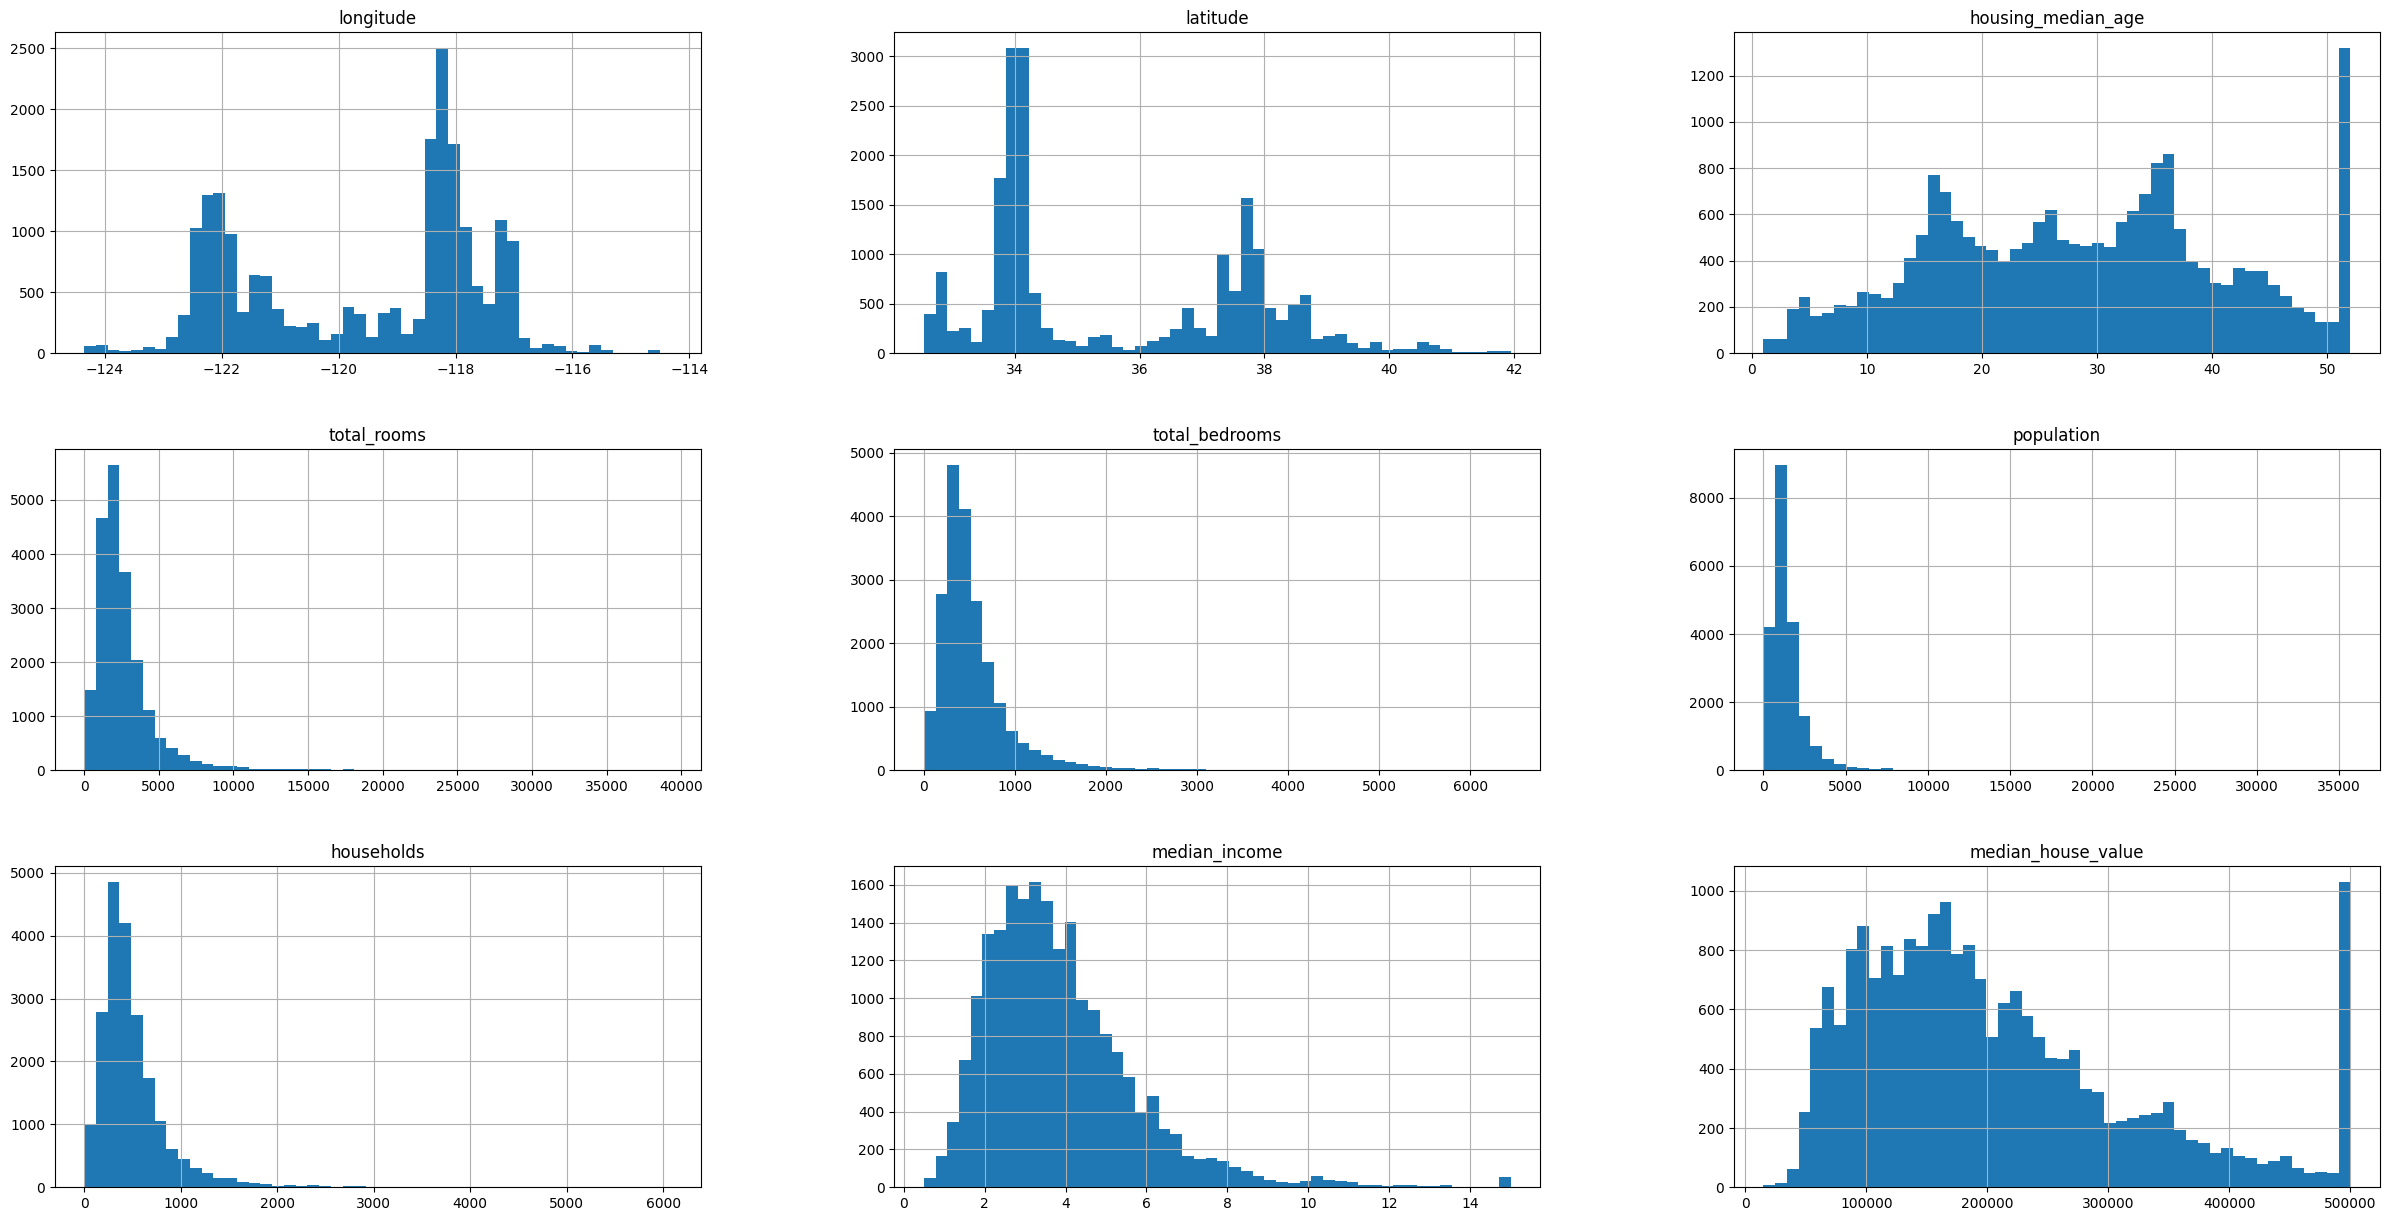

In [6]:
df.hist(bins=50, figsize=(30,15))
plt.show()

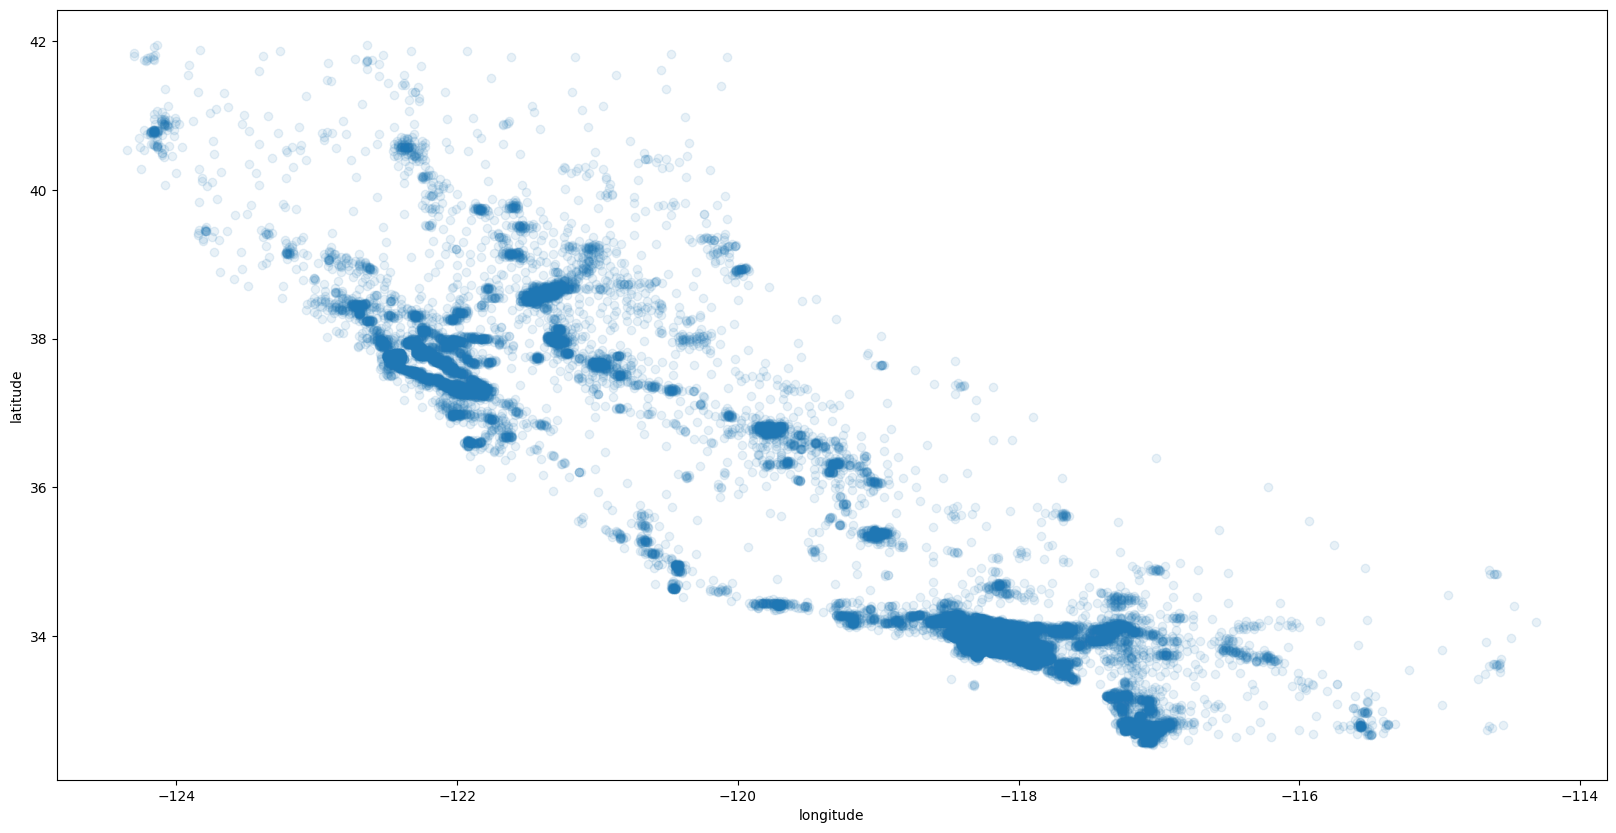

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter(x=df["longitude"], y=df["latitude"], alpha=0.1)
plt.xlabel("longitude")
plt.ylabel(("latitude"))
plt.show()

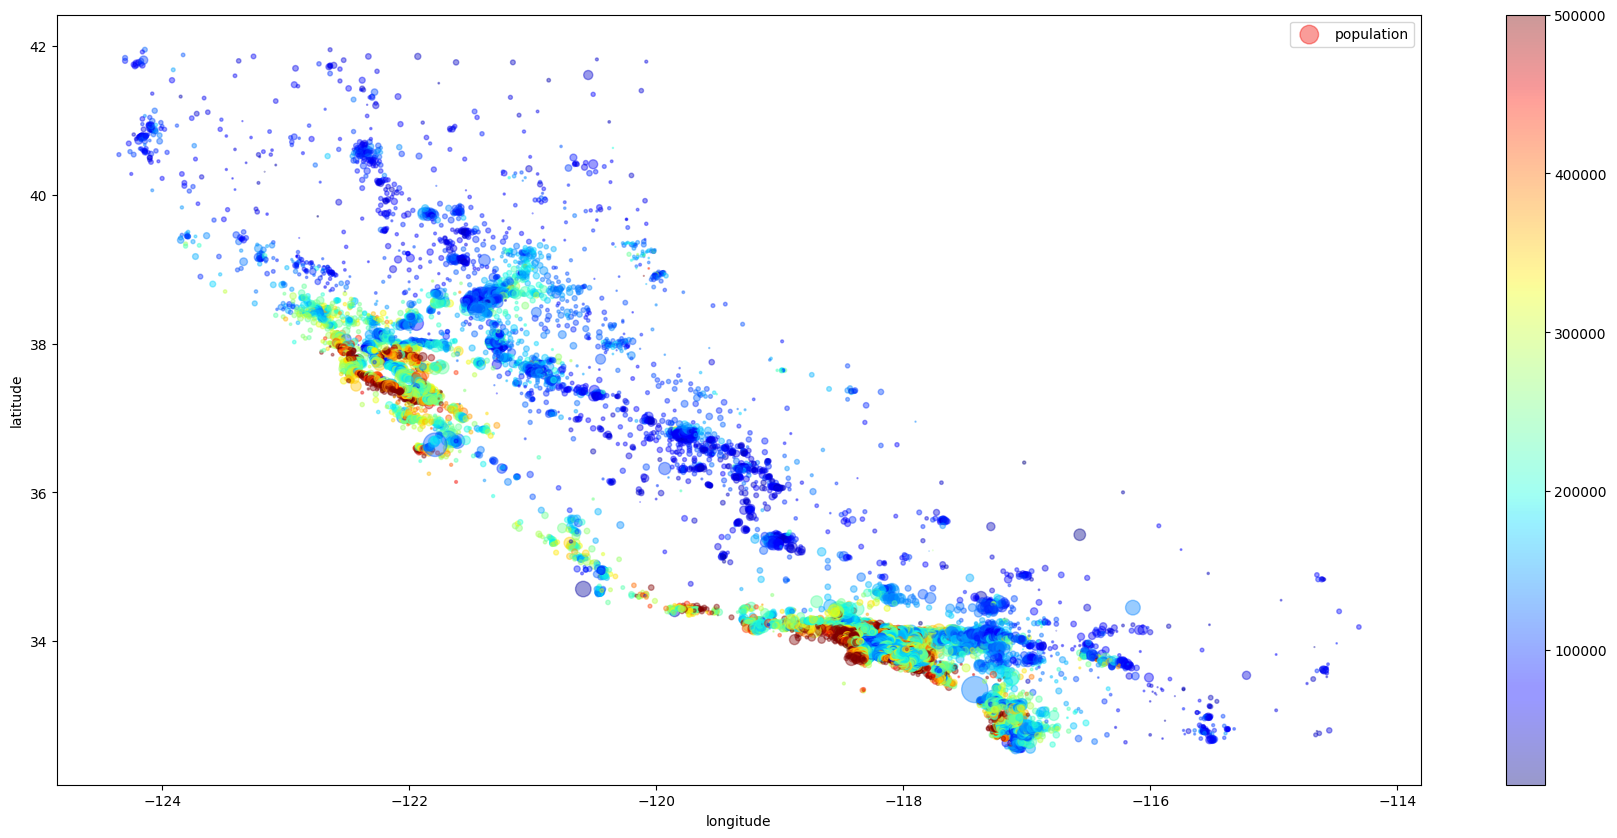

In [8]:
plt.figure(figsize=(22, 10))
plt.scatter(x=df["longitude"], y=df["latitude"], alpha= 0.4, s=df["population"]/100, label="population", c=df["median_house_value"], cmap=plt.get_cmap("jet"))#
plt.colorbar()
plt.legend()
plt.xlabel("longitude")
plt.ylabel(("latitude"))
plt.show()

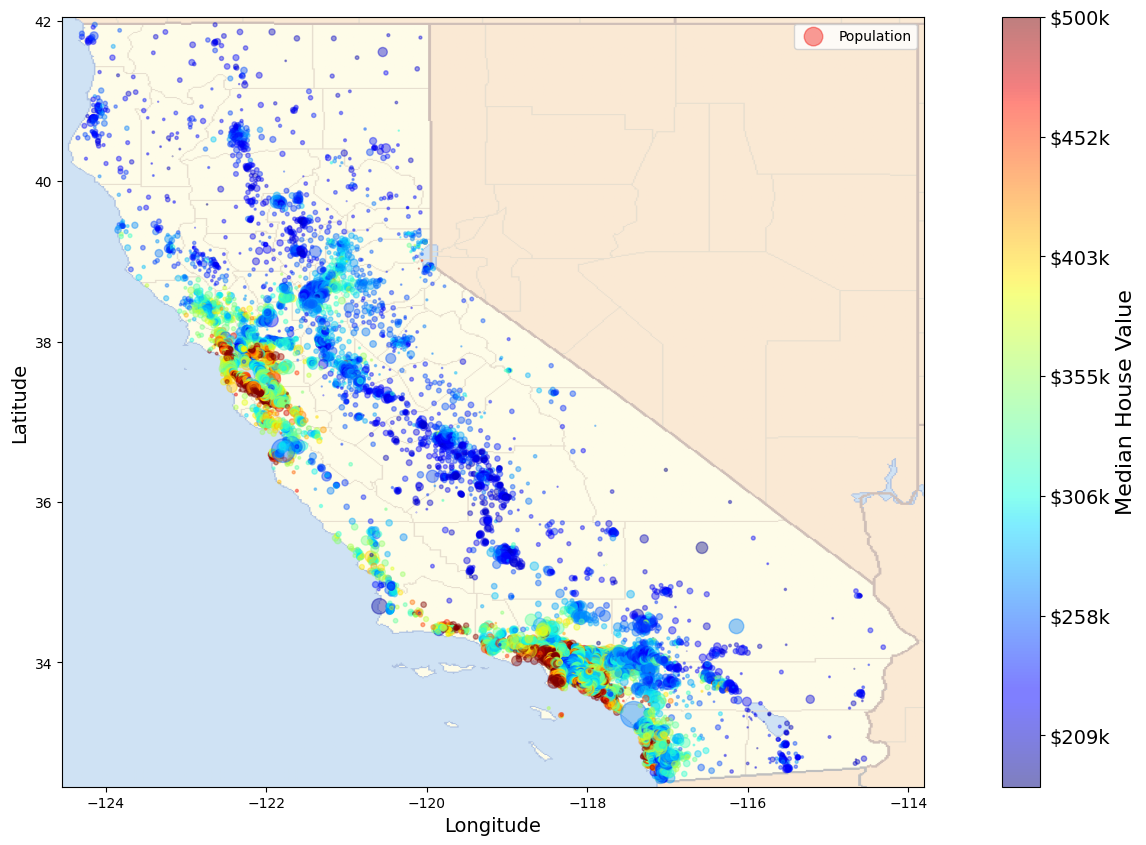

In [9]:
filename = "figures/california.png"
california_img=mpimg.imread(filename)

ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(20,10),
                  s=df['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend()
plt.show()


Calculate the Pearson's correlation of each variables

In [10]:
df.corr(method="pearson")

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

Draw a matrix of scatter plots for "median_house_value", "median_income", "total_rooms", and "housing_median_age"

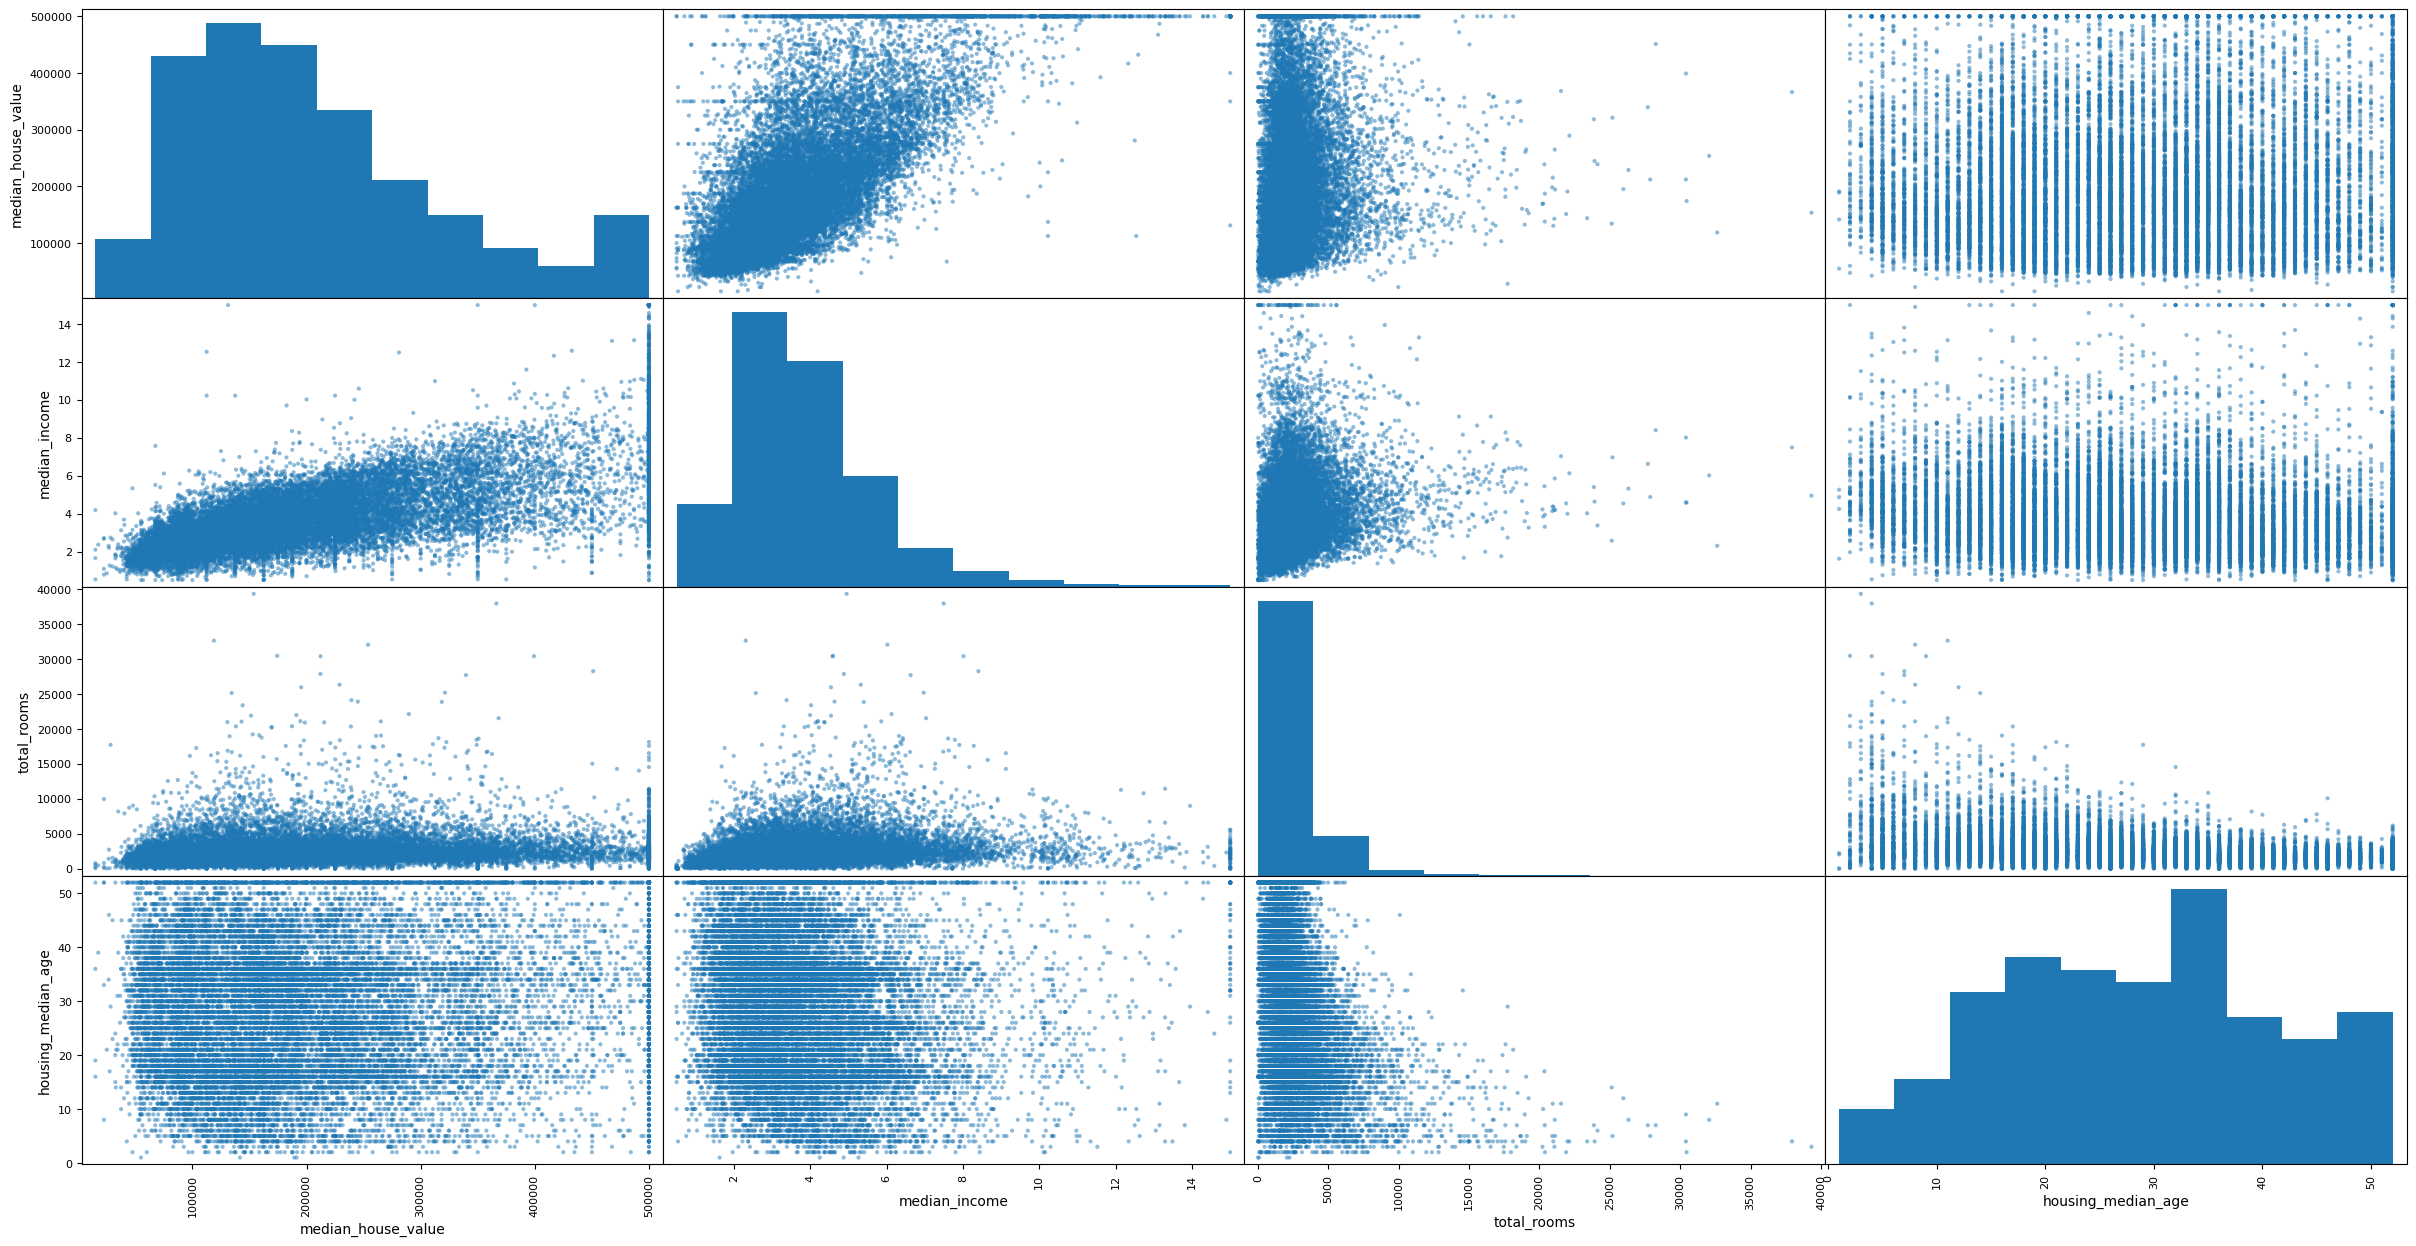

In [11]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(30, 15));

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


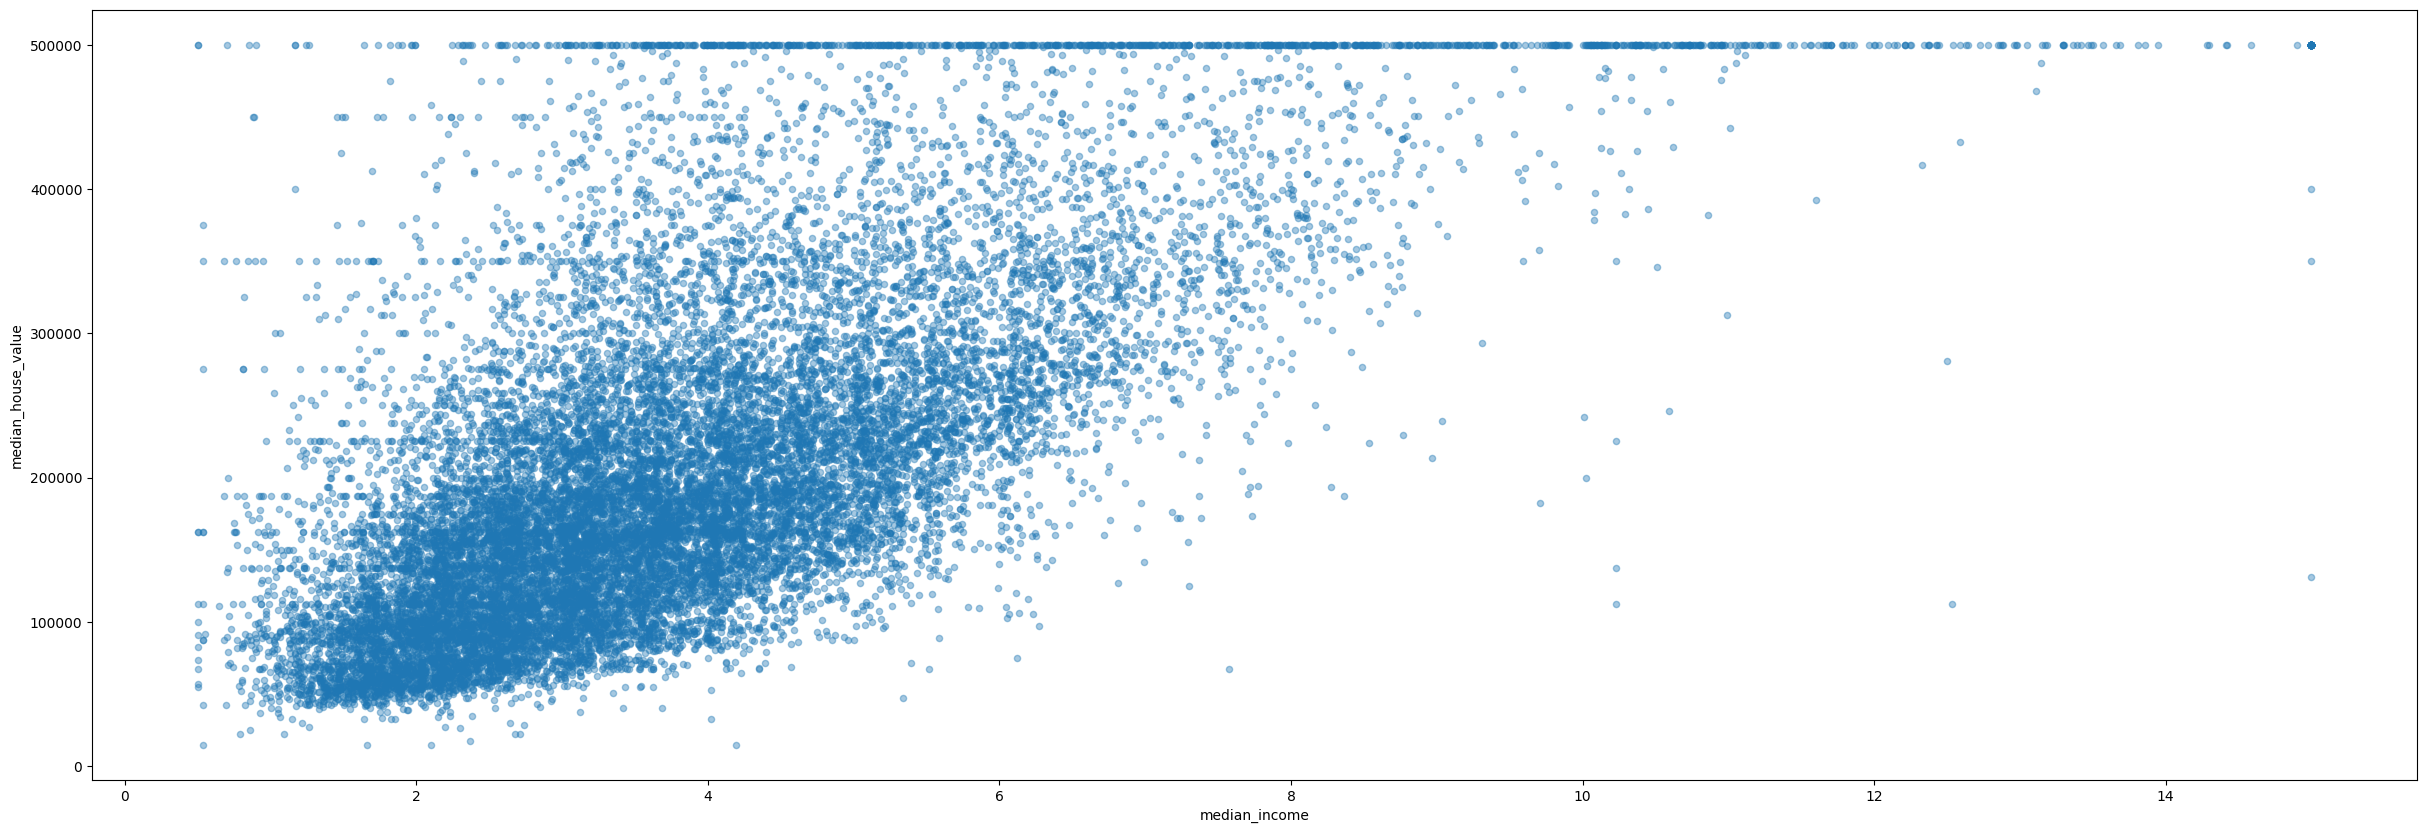

In [12]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4, figsize=(30, 10));

Attribute Combinations

In [13]:
median = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(median, inplace=True)

In [14]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]


Calculate the Pearson's correlation of each variables again

In [15]:
df.corr(method = 'pearson')['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

## Data Preparation

Encode Categorical Attribute using LabelEncoder

In [16]:
encoder = LabelEncoder()
df["ocean_proximity"] = encoder.fit_transform(df["ocean_proximity"])

Split the target and feature attribute

In [17]:
X = df.drop(["median_house_value"], axis=1)
y = pd.DataFrame(df["median_house_value"].copy())

Split the train and test test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 12)
(4128, 12)
(16512, 1)
(4128, 1)


Data Scaling using StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

Train a decision tree model

In [21]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

test_predict = regressor.predict(X_test)
rmse = mean_squared_error(y_test, test_predict, squared=False)
r_squared = r2_score(y_test, test_predict)

Evaluate the decision tree model result

In [22]:
print(f"Training result: RMSE : {rmse:.3f}, r2_score: {r_squared:.3f}")

Training result: RMSE : 72180.975, r2_score: 0.602


Evaluate the model using 10-fold-cross-validation

In [ ]:
cross_val = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-cross_val)
print(f"Mean: {rmse_scores.mean():.3f}")
print(f"Standard deviation {rmse_scores.std():.3f}")

From the evaluation results, it is known that the model built is overfitting and has poor performance

Train another model using Random Forest

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train.values.ravel())

rf_test_predict = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_test_predict, squared=False)
rf_r_squared = r2_score(y_test, rf_test_predict)

In [25]:
print(f"Training result: RMSE : {rf_rmse:.3f}, r2_score: {rf_r_squared:.3f}")

Training result: RMSE : 50198.554, r2_score: 0.808


In [26]:
rf_cross_val = cross_val_score(rf, X_train, y_train.values.ravel(), scoring="neg_mean_squared_error", cv=10)

In [27]:
rf_rmse_scores = np.sqrt(-rf_cross_val)
print(f"Mean: {rf_rmse_scores.mean():.3f}")
print(f"Standard deviation {rf_rmse_scores.std():.3f}")

Mean: 50289.526
Standard deviation 1555.266


## Fine Tuning

In [28]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [30]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

61452.732844420105 {'max_features': 2, 'n_estimators': 3}
54370.92004472679 {'max_features': 2, 'n_estimators': 10}
51775.32691349692 {'max_features': 2, 'n_estimators': 30}
59902.1500726393 {'max_features': 4, 'n_estimators': 3}
52126.59977223711 {'max_features': 4, 'n_estimators': 10}
49641.470297278465 {'max_features': 4, 'n_estimators': 30}
59555.50340489601 {'max_features': 6, 'n_estimators': 3}
52336.379323641115 {'max_features': 6, 'n_estimators': 10}
50184.744067972904 {'max_features': 6, 'n_estimators': 30}
59738.33703286975 {'max_features': 8, 'n_estimators': 3}
52727.771008574615 {'max_features': 8, 'n_estimators': 10}
50574.215589783475 {'max_features': 8, 'n_estimators': 30}
60724.22225565044 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53550.09865419685 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59574.492510088094 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51597.90396652493 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [31]:
best_model = grid_search.best_estimator_

train_predict = best_model.predict(X_train)
rf_train_rmse = mean_squared_error(y_train, train_predict, squared=False)
rf_train_r_squared = r2_score(y_train, train_predict)

test_predict = best_model.predict(X_test)
rf_test_rmse = mean_squared_error(y_test, test_predict, squared=False)
rf_test_r_squared = r2_score(y_test, test_predict)

In [32]:
print(f"Training result: RMSE : {rf_train_rmse:.3f}, r2_score: {rf_train_r_squared:.3f}")
print(f"Testing result: RMSE : {rf_test_rmse:.3f}, r2_score: {rf_test_r_squared:.3f}")

Training result: RMSE : 19428.177, r2_score: 0.972
Testing result: RMSE : 49891.839, r2_score: 0.810


Visualize the regression plot and the residual plot

In [33]:
train_predict = pd.DataFrame(train_predict)
test_predict = pd.DataFrame(test_predict)


In [34]:
y_train.reset_index()

index  median_house_value
0      14196            103000.0
1       8267            382100.0
2      17445            172600.0
3      14265             93400.0
4       2271             96500.0
...      ...                 ...
16507  11284            229200.0
16508  11964             97800.0
16509   5390            222100.0
16510    860            283500.0
16511  15795            325000.0

[16512 rows x 2 columns]

In [35]:
train_predict

0
0      108860.000000
1      375786.700000
2      196026.666667
3       92563.333333
4      102170.000000
...              ...
16507  254856.666667
16508  101816.666667
16509  221680.000000
16510  279700.000000
16511  327573.366667

[16512 rows x 1 columns]

## Save the Final Model

In [ ]:
filename = 'model/california-housing-price.sav'
pickle.dump(best_model, open(filename, 'wb'))

## Conclusion

Based on the evaluation results, it is known that the model built using the Random Forest method succeeded in obtaining higher accuracy than the Decision Tree model. This is indicated by the smaller RMSE value and higher R-Squared in the Random Forest model. The Random Forest model is also able to provide fairly accurate predictions on the testing set, with an RMSE value of 49863.336 and an R-Squared of 0.810.